**Importing Python Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/raw_data/StudentsPerformance.csv')

**Information of all columns**

In [ ]:
data.info('/content/raw_data/StudentsPerformance.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**Finding the null values**

In [ ]:
null_counts = data.isnull().sum()
print(null_counts)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


**Calculating the Average Score**

In [ ]:
data['average score'] = (data['math score'] + data['writing score'] + data['reading score'])/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average score'],
      dtype='object')

**Average Score**

In [ ]:
data['average score'] = np.round(data['average score'], 2)

In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


**Saving the data into Cleaned data folder**

In [ ]:
data.to_csv("/content/cleaned_data/Cleaned_Data_Student_Performance.csv")

# **Data Visualation**

### **1. Hist Plot of Race or Ethnicity**

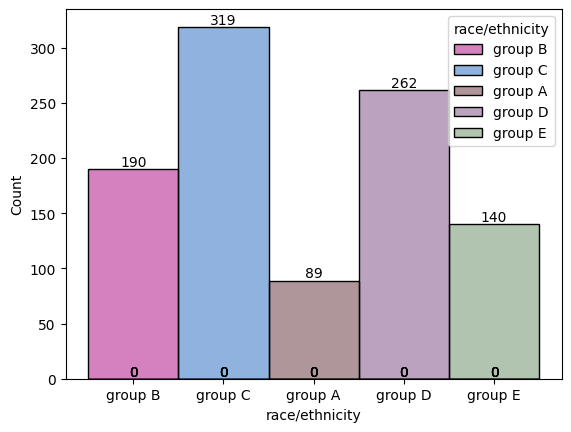

In [ ]:
own_palette = ["#ae0581", "#2067bf", "#602e36", "#794680", "#658b63"]
ax = sns.histplot(x='race/ethnicity', data=data,hue='race/ethnicity', legend= True, palette=own_palette)

#Race or Ethnicity count at the top
for j in ax.patches:
    ax.annotate(format(j.get_height(), '.0f'),
                 (j.get_x() + j.get_width() / 2., j.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 5),
                 textcoords = 'offset points')

plt.savefig('/content/snapshots_of_results/Race_Ethnicity_Count_SNS_plot.jpg')
plt.show()

### **2. Hist Plot of Gender Distribution**

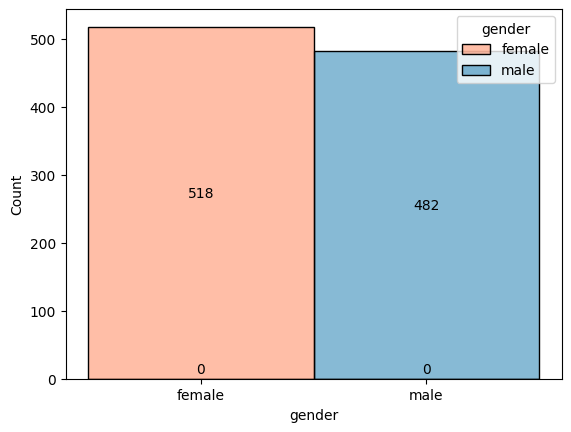

In [ ]:
own_palette1 = ["#ff7f50", "#1177ad"]
ax = sns.histplot(x='gender', data=data, hue='gender', legend= True, palette=own_palette1 )

#Gender Distribution count at the top
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                 (i.get_x() + i.get_width() / 2., i.get_height() / 2.),
                 ha = 'center', va = 'center',
                 xytext = (0, 7),
                 textcoords = 'offset points')
plt.savefig('/content/snapshots_of_results/Gender_Count_SNS_plot.jpg')
plt.show()

### **3. Line Plot of Average Score VS Math, Writing & Reading Score**

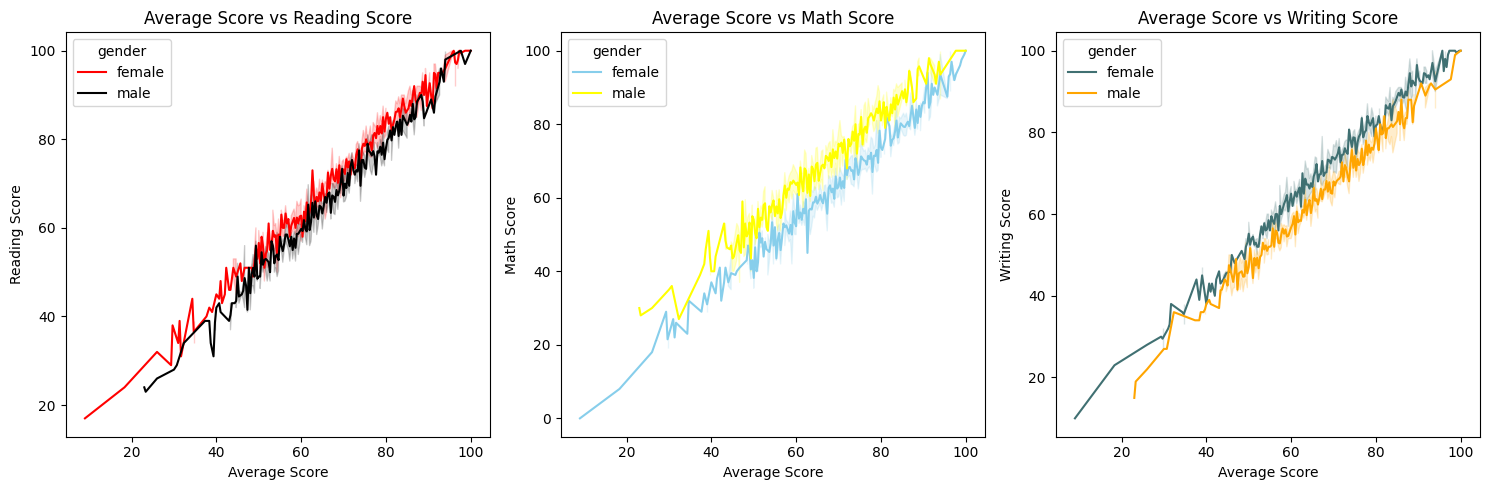

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Line plot: Average score vs Reading score
plt.subplot(1, 3, 1)
sns.lineplot(data=data, x="average score", y="reading score", hue="gender", palette=["#Ff0000", "#000000"])
plt.xlabel("Average Score")
plt.ylabel("Reading Score")
plt.title("Average Score vs Reading Score")

# Line plot: Average score vs Math score
plt.subplot(1, 3, 2)
sns.lineplot(data=data, x="average score", y="math score", hue="gender", palette=["#87CEEB", "#FFFF00"])
plt.xlabel("Average Score")
plt.ylabel("Math Score")
plt.title("Average Score vs Math Score")

# Line plot: Average score vs Writing score
plt.subplot(1, 3, 3)
sns.lineplot(data=data, x="average score", y="writing score", hue="gender", palette=["#407072", "#FFA500"])
plt.xlabel("Average Score")
plt.ylabel("Writing Score")
plt.title("Average Score vs Writing Score")

plt.tight_layout()

plt.savefig('/content/snapshots_of_results/Avg_vs_RS_MS_WS_lineplot.jpg')

plt.show()


### **4. Swarm Plot of Gender vs Average Score**

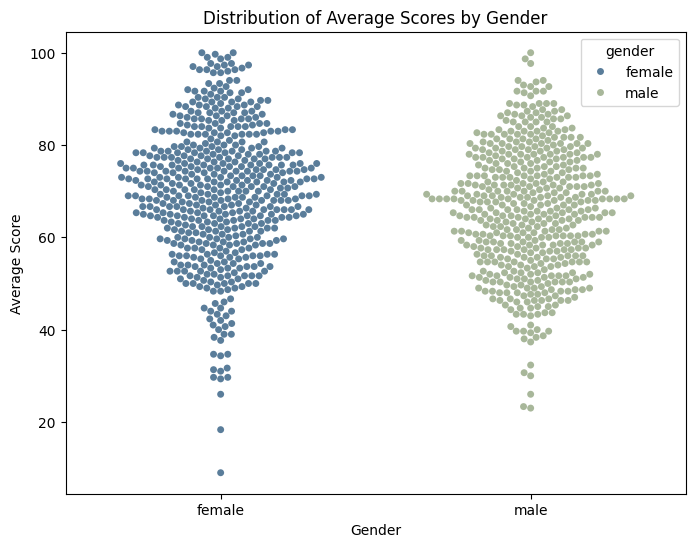

In [106]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='gender',y='average score', data=data, hue='gender', legend= True, palette=['#5a7d9a', '#a8b79a'])
plt.title('Distribution of Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')

plt.savefig('/content/snapshots_of_results/Avg_score_by_gender.jpg')
plt.show()

### **5. Violin Plot for Parental level of education VS Average Score**

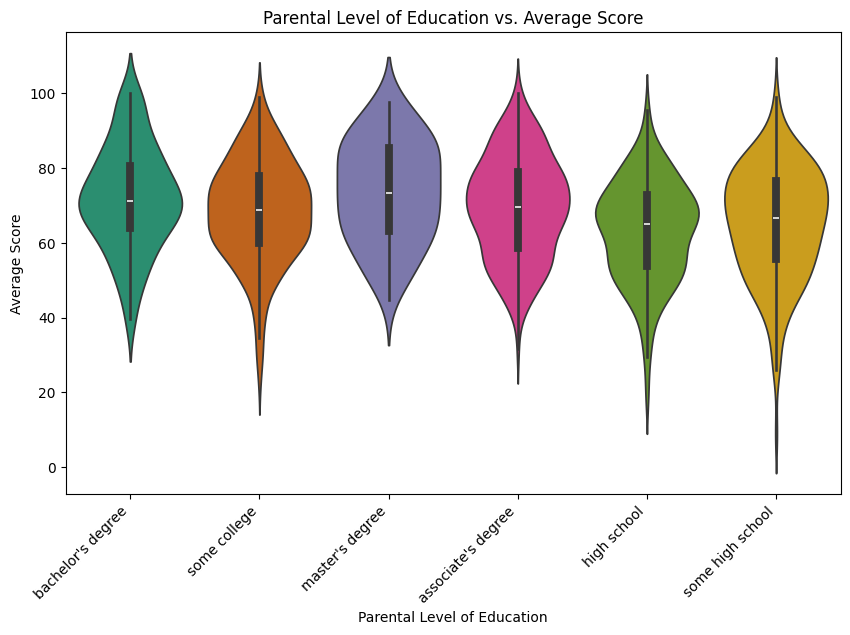

In [108]:
# Plotting
color_palette = []
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='parental level of education', y='average score', hue ='parental level of education', palette = "Dark2")
plt.title('Parental Level of Education vs. Average Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.savefig('/content/snapshots_of_results/ViolinPlot_PLE_VS_Avg_Score.jpg')
plt.show()